In [38]:
# Mount drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

# New Section

In [39]:
import os
path_Data = "/content/gdrive/MyDrive/Colab Notebooks/"
checkPath = os.path.isdir(path_Data)
print("The path is valid or not :", checkPath)  

The path is valid or not : True


In [40]:
# Importing the libraries
import pandas as pd
dataset = pd.read_csv(path_Data + "Communication Customer Churn.csv")
display(dataset.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
nrows = dataset.shape[0]
ncols = dataset.shape[1]
AttList = list(dataset.columns)

print("Number of Rows : ", nrows)
print("Number of Cols : ", ncols)
print("List of Attributes : ", AttList)
print("Number of Attributes : ", len(AttList))

Number of Rows :  3333
Number of Cols :  20
List of Attributes :  ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Number of Attributes :  20


In [42]:
import numpy as np
display(dataset.describe(include= np.object))
display(dataset.describe(include= np.number, percentiles = [0.33, 0.4, 0.67]))

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
33%,84.000000,415.000000,0.000000,155.200000,92.000000,26.380000,178.112000,91.000000,15.141200,178.556000,91.000000,8.035600,9.100000,3.000000,2.460000,1.000000
40%,91.000000,415.000000,0.000000,165.680000,96.000000,28.166000,188.000000,95.000000,15.980000,188.200000,95.000000,8.470000,9.700000,3.000000,2.620000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
67%,119.000000,415.000000,0.000000,204.244000,109.000000,34.718800,222.944000,109.000000,18.954400,223.544000,109.000000,10.060000,11.500000,5.000000,3.110000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
RowIndexList = [1, 3, 7]
ColIndexList = ['State', 'Account length', 'Area code', 'Total day minutes', 'Total day calls', 'Total day charge']

subdata01 = dataset.loc[:, ColIndexList]
display(subdata01.head())

subdata02 = dataset.loc[RowIndexList, :]
display(subdata02.head())

subdata03 = dataset.loc[RowIndexList, ColIndexList]
display(subdata03.head())

In [ ]:
dataset.iloc[0]

In [ ]:
Condition1 = (dataset['Churn'] == True)
Condition2 = (dataset['Total day calls'] > 100)
subdata = dataset[Condition2]
display(subdata.head(7))
Condition = ~(Condition1 | Condition2)
subdata = dataset[Condition]
display(subdata.head(7))

In [ ]:
Condition1 = (dataset['Voice mail plan'] == 'Yes')
Condition2 = (dataset['International plan'] == 'Yes')
Condition = ~(Condition1 | Condition2) 
subdata = dataset[Condition]
display(subdata.head(7))

In [ ]:
StateList = set(dataset['State'])
print(len(StateList))
print(StateList)

FreqSeries = dataset['State'].value_counts()
#print(FreqSeries)
StateFreqData = pd.DataFrame({'State':FreqSeries.index, 'Frequency':FreqSeries.values})
display(StateFreqData.head())

In [ ]:
import seaborn as sns
sns.catplot(x = "Churn", y = "Total day charge", kind="swarm", data = dataset)
sns.catplot(x = "Churn", y = "Total day charge", kind="box", data = dataset)

In [ ]:
sns.catplot(x = "Churn", kind="count", data = dataset)

In [ ]:
sns.distplot(dataset['Total day charge'], bins=15);

In [ ]:
sns.catplot(x = "Churn", y = "Total day charge", kind="boxen", data = dataset)
sns.catplot(x = "Churn", y = "Total day charge", kind="bar", data = dataset)

In [ ]:
import seaborn as sns
sns.catplot(x = "Churn", y = "Total day charge", hue = "International plan", kind="swarm", data = dataset)
sns.catplot(x = "Churn", y = "Total day charge", hue = "International plan", kind="box", data = dataset)

In [ ]:
sns.catplot(x = "Customer service calls", hue = "Churn", kind="count", data = dataset)

In [ ]:
from sklearn.preprocessing import LabelEncoder as lb
dataset['State_Encode'] = lb().fit_transform(dataset['State'])
dataset['International plan encode'] = lb().fit_transform(dataset['International plan'])
dataset['Voice mail plan Encode'] = lb().fit_transform(dataset['Voice mail plan'])
dataset['Area code Encode'] = lb().fit_transform(dataset['Area code'])
display(dataset.head(10))

In [ ]:
from sklearn.model_selection import train_test_split

AttList = ['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge']
X = dataset.loc[:, AttList].values
y = dataset.loc[:, ['Churn']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

print("Shape of X_train", X_train.shape)
print("Shape of X_train", X_test.shape)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense 

classifier = Sequential()
classifier.add(Dense(6, activation = 'relu', input_dim = 4))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

In [ ]:
score = classifier.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
import numpy as np
display(dataset.describe(include= np.object))
display(dataset.describe(include= np.number, percentiles = [0.33, 0.4, 0.67]))

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
33%,84.000000,415.000000,0.000000,155.200000,92.000000,26.380000,178.112000,91.000000,15.141200,178.556000,91.000000,8.035600,9.100000,3.000000,2.460000,1.000000
40%,91.000000,415.000000,0.000000,165.680000,96.000000,28.166000,188.000000,95.000000,15.980000,188.200000,95.000000,8.470000,9.700000,3.000000,2.620000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
67%,119.000000,415.000000,0.000000,204.244000,109.000000,34.718800,222.944000,109.000000,18.954400,223.544000,109.000000,10.060000,11.500000,5.000000,3.110000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
y = dataset['Churn'] == 'True'

dataset['Churn'] = dataset['Churn'].apply(lambda x: 1 if bool(x) else 0  )

X = dataset[['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']]
Y = dataset['Churn']

lr=LogisticRegression()
lr.fit(X,Y)
print(lr.coef_)


[[-4.27600666e-04 -7.19280759e-03 -2.44461073e-02  1.00978090e-02
  -4.20580991e-03  1.70693168e-03  3.70628740e-03 -6.30303792e-03
   2.91430976e-04  3.73375751e-04 -6.01606646e-03  2.37427438e-05
   2.91556008e-02 -1.35825089e-01  7.87772414e-03  3.86110187e-01]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
import seaborn as sns
sns.catplot(x = "Churn", y = "Customer service calls", kind="swarm", data = dataset)
sns.catplot(x = "Churn", y = "Customer service calls", kind="box", data = dataset)

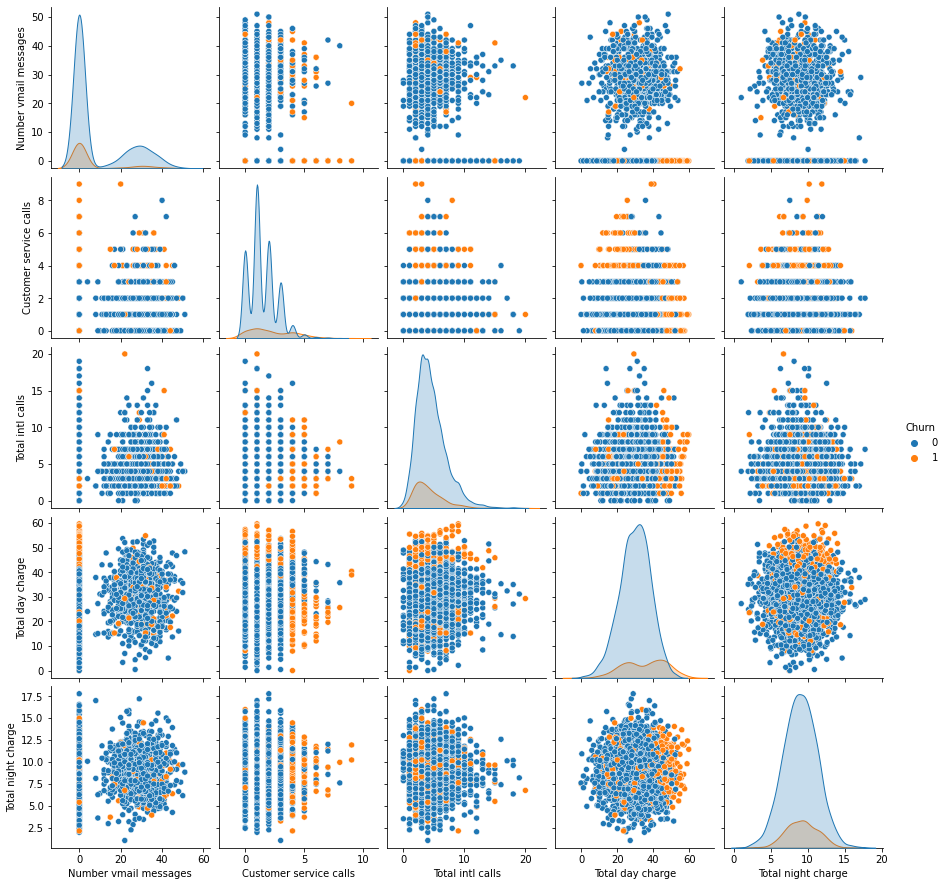

In [82]:
# plot maxtrix
import seaborn as sns
ColIndexList=['Number vmail messages','Customer service calls','Total intl calls','Total day charge','Total night charge','Churn']
subdata =  dataset.loc[:,ColIndexList]
subdata
sns.pairplot(subdata, hue="Churn")
